# Librerias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import h5py

#import matplotlib.patches.Circle as Circle

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
#from sklearn.model_selection import train_test_split

from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset de etiquetas

In [ ]:
#Se cargan las etiquetas, 21016 filas con 8 columnas

data = np.load('/content/drive/MyDrive/TEIA/Proyecto Final/Cyclone_Labels h5.npy',allow_pickle=True)
print(data.shape)
print(data.dtype)
print(data)

(21076, 8)
object
[['ATLN' '200301L' -66.0 ... 30.0 0.0 1008.0]
 ['ATLN' '200301L' -66.3 ... 30.0 0.0 1007.0]
 ['ATLN' '200301L' -66.6 ... 30.0 0.0 1007.0]
 ...
 ['WPAC' '201630W' 113.3 ... 25.0 0.0 1007.0]
 ['WPAC' '201630W' 112.8 ... 23.0 0.0 1007.0]
 ['WPAC' '201630W' 112.3 ... 20.0 0.0 1007.0]]


In [ ]:
#Se interpretan las etiquetas

columns = ['basin', 'id', 'longitude', 'latitude', 'time',
           'max_winds', 'size', 'pressure']
Labels = pd.DataFrame(data,columns=columns)
print(Labels.describe())

        basin       id  longitude  latitude        time  max_winds     size  \
count   21076    21076    21076.0   21076.0       21076    21076.0  21076.0   
unique      3      485     2101.0     458.0        7077       75.0    399.0   
top      WPAC  200409L      130.1      16.1  2005091815       25.0      0.0   
freq     8922      172       46.0     184.0          14     2410.0   8782.0   

        pressure  
count    21076.0  
unique     136.0  
top       1000.0  
freq      1182.0  


In [ ]:
#Interpretacion de las etiquetas (oceanos)

np.unique(Labels['basin'],return_counts=True)

(array(['ATLN', 'EPAC', 'WPAC'], dtype=object), array([7144, 5010, 8922]))

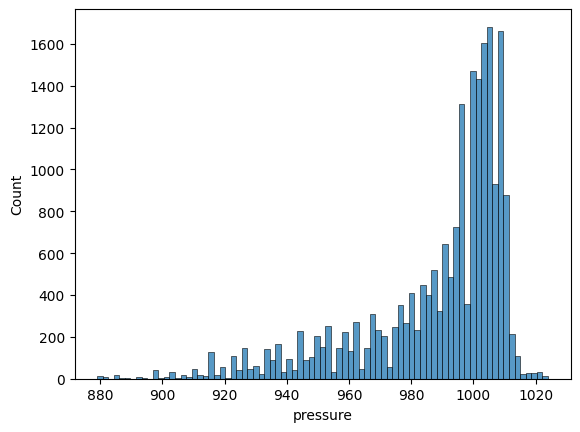

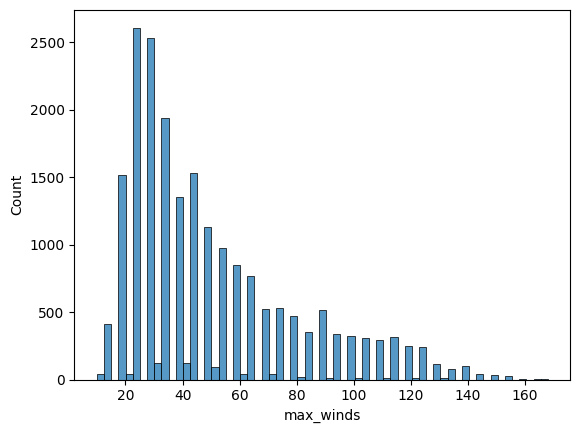

In [ ]:
#Analisis de las etiquetas: histogramas preliminares

sns.histplot(Labels["pressure"])
plt.show()
sns.histplot(Labels["max_winds"])
plt.show()

In [ ]:
#Verificacion de existencia de valores nulos

print(Labels.isnull().sum())

basin        0
id           0
longitude    0
latitude     0
time         0
max_winds    0
size         0
pressure     0
dtype: int64


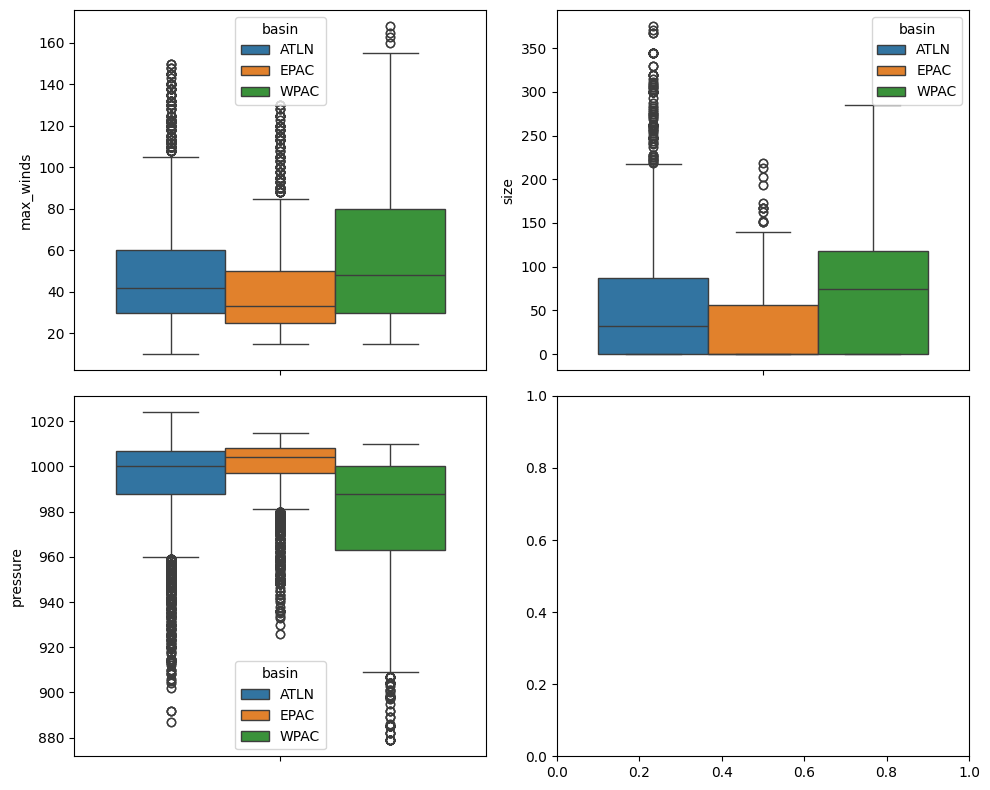

In [ ]:
#Diagramas de caja

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
ax1 = sns.boxplot(data=Labels,y="max_winds",hue="basin",ax=axes[0,0])
ax2 = sns.boxplot(data=Labels,y="size",hue="basin",ax=axes[0,1])
ax3 = sns.boxplot(data=Labels,y="pressure",hue="basin",ax=axes[1,0])
plt.tight_layout()
plt.show()

<Axes: >

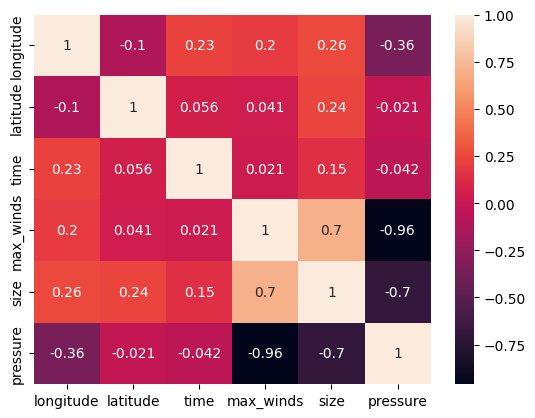

In [ ]:
#Matriz de correlacion

matrix = Labels.drop(["basin","id"], axis=1).corr()
sns.heatmap(matrix,annot=True)

In [ ]:
#Construcción del target

Categories = []
for i in range(21076):
  if Labels["max_winds"][i] <= 33:
   Categories.append(0)
  elif 34 <= Labels["max_winds"][i] <= 63:
   Categories.append(1)
  elif 64 <= Labels["max_winds"][i] <= 82:
   Categories.append(2)
  elif 83 <= Labels["max_winds"][i] <= 95:
   Categories.append(3)
  elif 96 <= Labels["max_winds"][i] <= 112:
   Categories.append(4)
  elif 113 <= Labels["max_winds"][i] <= 136:
   Categories.append(5)
  elif Labels["max_winds"][i] >= 137:
   Categories.append(6)
Labels["category"] = Categories

#0 -> Depresion Tropical
#1 -> Tormenta Tropical
#2 -> Categoria 1
#3 -> Categoria 2
#4 -> Categoria 3
#5 -> Categoria 4
#6 -> Categoria 5
print(Labels.head())

  basin       id longitude latitude        time max_winds size pressure  \
0  ATLN  200301L     -66.0     31.4  2003041815      30.0  0.0   1008.0   
1  ATLN  200301L     -66.3     31.9  2003041818      30.0  0.0   1007.0   
2  ATLN  200301L     -66.6     32.5  2003041821      30.0  0.0   1007.0   
3  ATLN  200301L     -68.6     34.5  2003041912      35.0  0.0   1006.0   
4  ATLN  200301L     -68.8     34.4  2003041915      35.0  0.0   1006.0   

   category  
0         0  
1         0  
2         0  
3         1  
4         1  


In [ ]:
#Separación de datos

#train_set, test_set \
  #= train_test_split(Labels, test_size = 0.2, random_state = 42)

#print(len(train_set))
#print(len(test_set))

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Labels, Labels["category"]):
  strat_train_set = Labels.loc[train_index]
  strat_test_set = Labels.loc[test_index]

#print("---")

print(len(strat_train_set))
print(len(strat_test_set))

print("---")

print(strat_train_set.head())
print(strat_train_set.index)

16860
4216
---
      basin       id longitude latitude        time max_winds  size pressure  \
7496   WPAC  200420W     135.9     15.2  2004082006      40.0  40.0    994.0   
16407  EPAC  200809E    -133.7     18.5  2008081218      40.0  52.5   1002.0   
2101   ATLN  200605L     -37.9     20.5  2006082415      45.0  32.5   1000.0   
2612   ATLN  200715L     -31.8     40.8  2007101618      40.0  82.5    996.0   
2213   ATLN  200608L     -57.4     21.6  2006091121      45.0  20.6   1004.0   

       category  
7496          1  
16407         1  
2101          1  
2612          1  
2213          1  
Index([ 7496, 16407,  2101,  2612,  2213,  7873, 14814, 16475,  2558,  8629,
       ...
        4072,   804,  4031, 17484, 19988, 20417,  3572, 19335, 20911, 17397],
      dtype='int64', length=16860)


In [ ]:
#Escalamiento

cols = ["longitude","latitude","max_winds","size","pressure"]

scale = strat_train_set[cols]
scaler = MinMaxScaler()
scaler.fit(scale)
X = scaler.transform(scale)
Labels_train = pd.DataFrame(X,columns=cols,index=strat_train_set.index)
Labels_train["basin"] = strat_train_set["basin"]
Labels_train["id"] = strat_train_set["id"]
Labels_train["time"] = strat_train_set["time"]
Labels_train["category"] = strat_train_set["category"]
print(Labels_train.head())

print("---")

scale = strat_test_set[cols]
scaler = MinMaxScaler()
scaler.fit(scale)
X = scaler.transform(scale)
Labels_test = pd.DataFrame(X,columns=cols,index=strat_test_set.index)
Labels_test["basin"] = strat_test_set["basin"]
Labels_test["id"] = strat_test_set["id"]
Labels_test["time"] = strat_test_set["time"]
Labels_test["category"] = strat_test_set["category"]
print(Labels_test.head())

       longitude  latitude  max_winds      size  pressure basin       id  \
7496    0.879877  0.271457   0.189873  0.106667  0.798611  WPAC  200420W   
16407   0.128484  0.337325   0.189873  0.140000  0.854167  EPAC  200809E   
2101    0.395485  0.377246   0.221519  0.086667  0.840278  ATLN  200605L   
2612    0.412486  0.782435   0.189873  0.220000  0.812500  ATLN  200715L   
2213    0.341137  0.399202   0.221519  0.054933  0.868056  ATLN  200608L   

             time  category  
7496   2004082006         1  
16407  2008081218         1  
2101   2006082415         1  
2612   2007101618         1  
2213   2006091121         1  
---
       longitude  latitude  max_winds      size  pressure basin       id  \
7116    0.839754  0.386774   0.551724  0.195312  0.517241  WPAC  200407W   
8964    0.811279  0.242485   0.137931  0.000000  0.834483  WPAC  200706W   
3558    0.434115  0.294589   0.124138  0.000000  0.896552  ATLN  201612L   
18152   0.907035  0.220441   0.103448  0.000000  0.8482

# Imagenes

In [ ]:
images = h5py.File("/content/drive/MyDrive/TEIA/Proyecto Final/IMG1_infrared_images.h5", "r")
print(images.keys())
IMG = images["infrared_images"][:]
IMG = IMG/255
print(IMG.shape)
print(IMG[0].shape)

<KeysViewHDF5 ['infrared_images']>
(21076, 128, 128)
(128, 128)


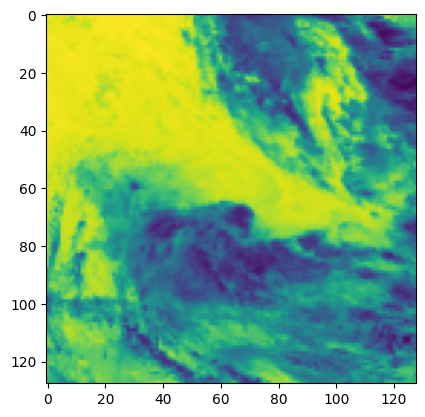

In [ ]:
plt.imshow(IMG[0]) #800 kms de ancho
plt.show()

In [ ]:
IMG_train = []
IMG_test = []
for i in Labels_train.index:
 IMG_train.append(IMG[i])
for i in Labels_test.index:
 IMG_test.append(IMG[i])

IMG_train = np.array(IMG_train)
IMG_test = np.array(IMG_test)

IMG_train = IMG_train.reshape(IMG_train.shape[0],IMG_train.shape[1],IMG_train.shape[1],1)
IMG_test = IMG_test.reshape(IMG_test.shape[0],IMG_test.shape[1],IMG_train.shape[1],1)

print(IMG_train.shape)
print(IMG_test.shape)

(16860, 128, 128, 1)
(4216, 128, 128, 1)


id = 200409W
Tiempo = 2004061606
Longitud = 136.0
Latitud = 15.2
Presion minima = 879.0
Vientos máximos = 155.0
Categoria = 6
---
Radio en millas nauticas = 142.5
Radio en kilometros = 76.9438444924406
Radio en pixeles = 19.23596112311015


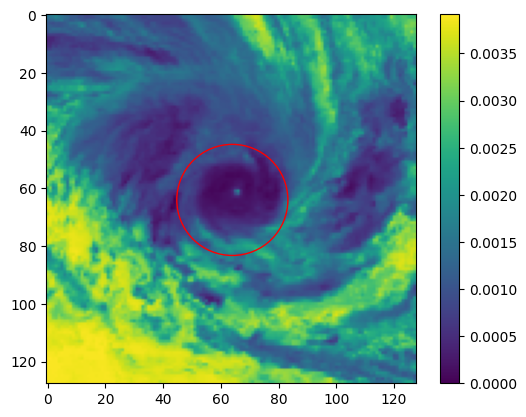

In [ ]:

#Analisis de un caso: Tifon Dianmu de 2004

print(f"id = {Labels["id"][7175]}")
print(f"Tiempo = {Labels["time"][7175]}")
print(f"Longitud = {Labels["longitude"][7175]}")
print(f"Latitud = {Labels["latitude"][7175]}")
print(f"Presion minima = {Labels["pressure"][7175]}")
print(f"Vientos máximos = {Labels["max_winds"][7175]}")
print(f"Categoria = {Labels["category"][7175]}")

print("---")

print(f"Radio en millas nauticas = {Labels["size"][7175]}")
radius = Labels["size"][7175]/1.852
print(f"Radio en kilometros = {radius}")
radius = radius/4
print(f"Radio en pixeles = {radius}")

figure, axes = plt.subplots()
Circle = plt.Circle((64,64),radius,fill=False,color="red")
axes.set_aspect(1)
axes.add_artist(Circle)

plt.imshow(IMG[7175])
plt.colorbar()
plt.show()

id = 200511W
Tiempo = 2005082306
Longitud = 137.6
Latitud = 26.3
Presion minima = 944.0
Vientos máximos = 100.0
Categoria = 4
---
Radio en millas nauticas = 110.0
Radio en kilometros = 59.39524838012959
Radio en pixeles = 14.848812095032397


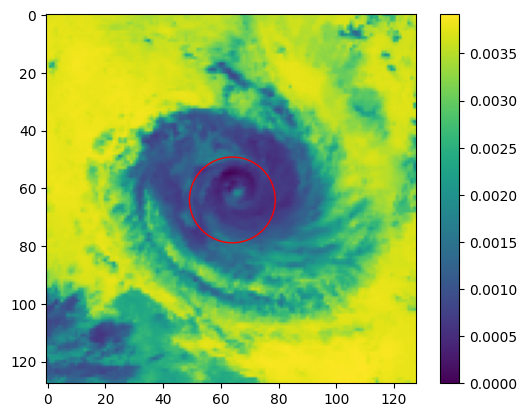

In [ ]:
#Analisis de otro caso
if True == True:
  id=18719
  print(f"id = {Labels["id"][id]}")
  print(f"Tiempo = {Labels["time"][id]}")
  print(f"Longitud = {Labels["longitude"][id]}")
  print(f"Latitud = {Labels["latitude"][id]}")
  print(f"Presion minima = {Labels["pressure"][id]}")
  print(f"Vientos máximos = {Labels["max_winds"][id]}")
  print(f"Categoria = {Labels["category"][id]}")

  print("---")

  print(f"Radio en millas nauticas = {Labels["size"][id]}")
  radius = Labels["size"][id]/1.852
  print(f"Radio en kilometros = {radius}")
  radius = radius/4
  print(f"Radio en pixeles = {radius}")

  figure, axes = plt.subplots()
  Circle = plt.Circle((64,64),radius,fill=False,color="red")
  axes.set_aspect(1)
  axes.add_artist(Circle)

  plt.imshow(IMG[id])
  plt.colorbar()
  plt.show()

# Testeo

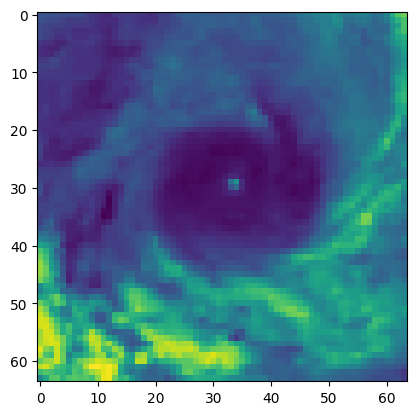

In [ ]:
plt.imshow(IMG[7175][32:96, 32:96])

In [ ]:
#IMG_train_crop = []
#for i in range(len(IMG_train)):
  #IMG_train_crop.append(IMG_train[i][32:96,32:96])
#IMG_train_crop = np.array(IMG_train_crop)
#IMG_train_crop = IMG_train_crop.reshape(IMG_train_crop.shape[0],IMG_train_crop.shape[1],IMG_train_crop.shape[1],1)

#IMG_test_crop = []
#for i in range(len(IMG_test)):
  #IMG_test_crop.append(IMG_test[i][32:96,32:96])
#IMG_test_crop = np.array(IMG_test_crop)
#IMG_test_crop = IMG_test_crop.reshape(IMG_test_crop.shape[0],IMG_test_crop.shape[1],IMG_test_crop.shape[1],1)

In [ ]:
#print(np.shape(IMG_train_crop))
#print(np.shape(IMG_test_crop))

In [ ]:
data_augmentation = keras.Sequential([
  keras.layers.RandomRotation(0.2),
  keras.layers.CenterCrop(64, 64)
  #keras.layers.RandomFlip("horizontal"),
  #keras.layers.RandomFlip("vertical"),
])

In [ ]:
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True
    )
]

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(128, 128, 1)),
    data_augmentation,
    keras.layers.Conv2D(filters=16,kernel_size=(4, 4),strides=2,activation='relu'),
    keras.layers.Conv2D(filters=32,kernel_size=(3, 3),strides=2,activation='relu'),
    keras.layers.Conv2D(filters=64,kernel_size=(3, 3),strides=2,activation='relu'),
    keras.layers.Conv2D(filters=128,kernel_size=(3,3),strides=2,activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(1152,activation="relu"),
    keras.layers.Dense(256,activation="relu"),
    #keras.layers.Dropout(0.3),
    keras.layers.Dense(128,activation="relu"),
    #keras.layers.Dropout(0.3),
    keras.layers.Dense(7,activation="softmax")
])

In [ ]:
keras.backend.clear_session()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(IMG_train, Labels_train["category"], validation_data=(IMG_test,Labels_test["category"]), epochs=100, verbose=1,
                    callbacks=[callbacks])

Epoch 1/100
527/527 ━━━━━━━━━━━━━━━━━━━━ 47s 83ms/step - accuracy: 0.3911 - loss: 1.4545 - val_accuracy: 0.5019 - val_loss: 1.1311
Epoch 2/100
527/527 ━━━━━━━━━━━━━━━━━━━━ 43s 82ms/step - accuracy: 0.4992 - loss: 1.1541 - val_accuracy: 0.5123 - val_loss: 1.1130
Epoch 3/100
527/527 ━━━━━━━━━━━━━━━━━━━━ 42s 81ms/step - accuracy: 0.5118 - loss: 1.1209 - val_accuracy: 0.5256 - val_loss: 1.0937
Epoch 4/100
527/527 ━━━━━━━━━━━━━━━━━━━━ 42s 79ms/step - accuracy: 0.5159 - loss: 1.0987 - val_accuracy: 0.5493 - val_loss: 1.0217
Epoch 5/100
527/527 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.5435 - loss: 1.0481 - val_accuracy: 0.5467 - val_loss: 1.0074
Epoch 6/100
527/527 ━━━━━━━━━━━━━━━━━━━━ 45s 85ms/step - accuracy: 0.5500 - loss: 1.0241 - val_accuracy: 0.5752 - val_loss: 0.9833
Epoch 7/100
527/527 ━━━━━━━━━━━━━━━━━━━━ 43s 82ms/step - accuracy: 0.5566 - loss: 1.0000 - val_accuracy: 0.5538 - val_loss: 1.0049
Epoch 8/100
527/527 ━━━━━━━━━━━━━━━━━━━━ 42s 80ms/step - accuracy: 0.5632 - loss: 0

Train: 0.960, Test: 0.870


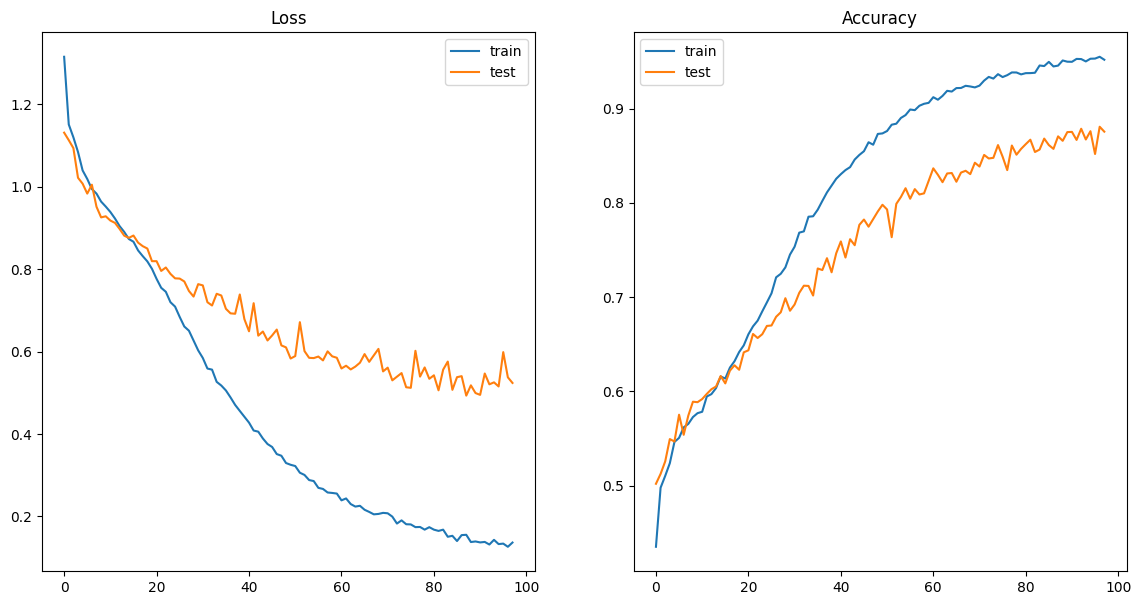

In [ ]:
_, train_acc = model.evaluate(IMG_train, Labels_train["category"], verbose=0)
_, test_acc = model.evaluate(IMG_test, Labels_test["category"], verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

plt.figure(figsize=(14,7))
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

basin              WPAC
id              200706W
longitude         111.2
latitude           13.9
time         2007080403
max_winds          30.0
size                0.0
pressure         1000.0
category              0
Name: 8964, dtype: object


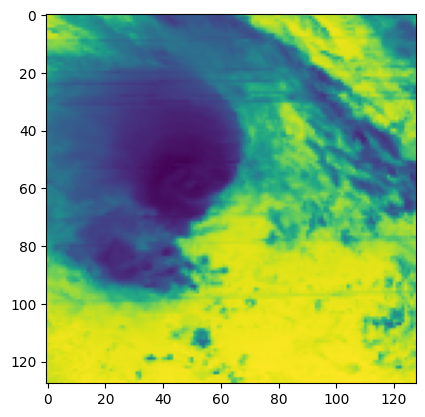

In [ ]:
for i in Labels_test.index:
  if Labels["pressure"][i] == 900:
    desired_index = i
    break

for i in range(4216):
  if Labels_test.index[i] == desired_index:
    desired_image = i

print(Labels.iloc[desired_index])
plt.imshow(IMG_test[desired_image])

In [ ]:
q = model.predict(IMG_test)


132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


[9.78510201e-01 2.14896873e-02 1.26312527e-09 1.01893045e-08
 7.08509917e-10 1.77862369e-09 2.37272348e-20]


Text(0.5, 1.0, 'Predicción')

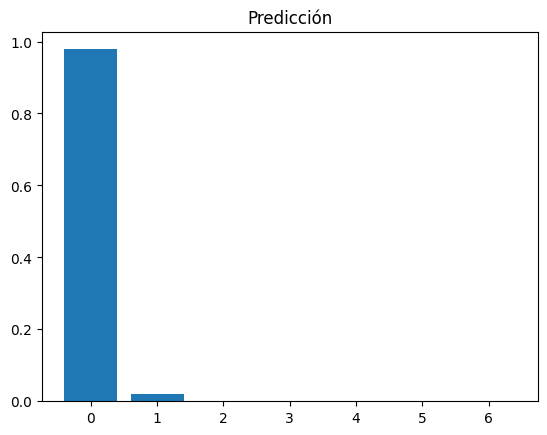

In [ ]:
print(q[desired_image])
plt.bar(range(7),q[desired_image])
plt.title("Predicción")

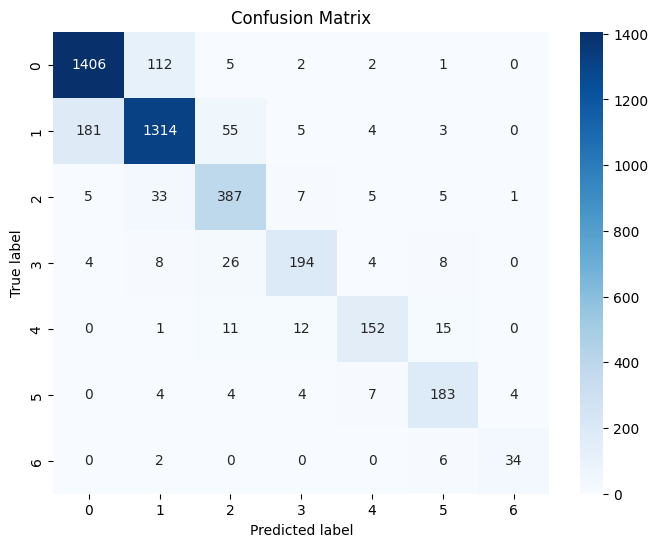

In [ ]:
y_pred = np.argmax(q, axis=1)
y_true = Labels_test["category"]
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()